In [11]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [12]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [13]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [14]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

In [15]:
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


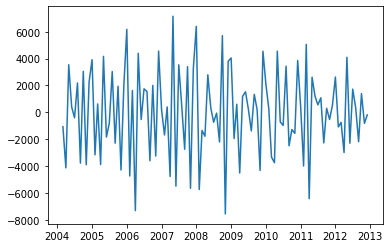

In [16]:
plt.plot(series)

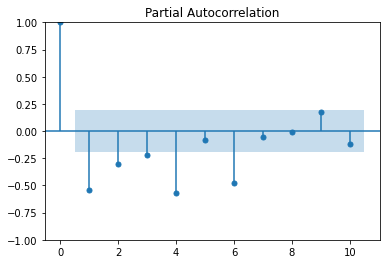

In [17]:
plot_pacf(series, lags=10,method='ywm')
plt.show()

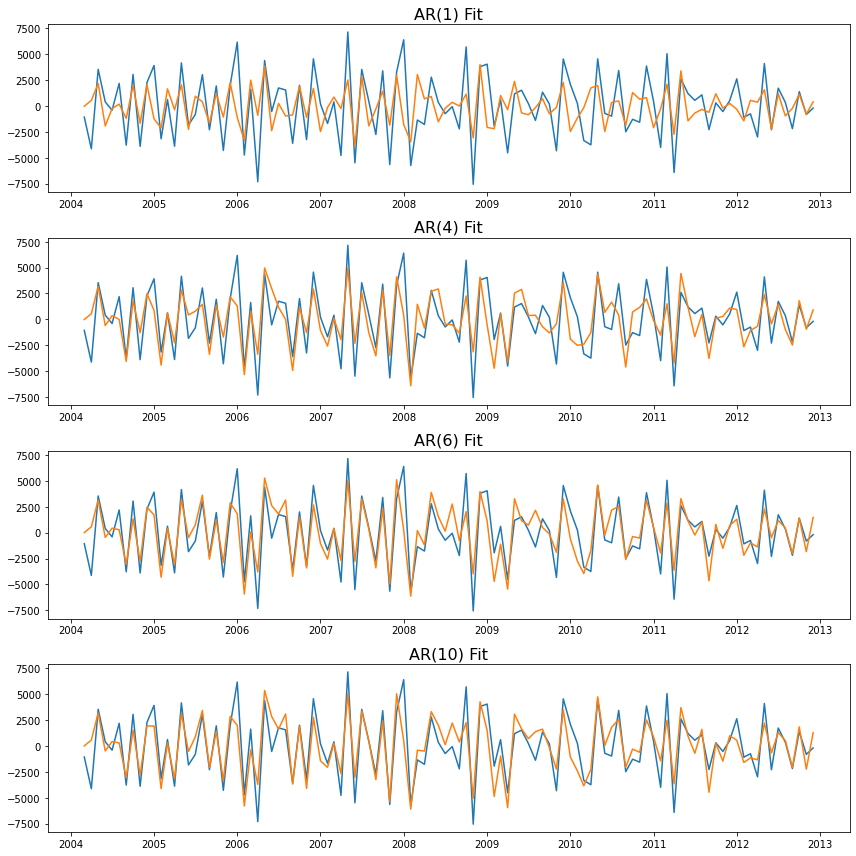

In [19]:
plt.figure(figsize=(12,12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()


In [20]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(1): 1980.86062174453
AIC for AR(4): 1927.609985266038
AIC for AR(6): 1899.6497442661591
AIC for AR(10): 1902.376545011473


In [21]:
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8509390268662
BIC for AR(4): 1943.5906198307102
BIC for AR(6): 1920.9572570190558
BIC for AR(10): 1934.3378141408177
